In [18]:
import pandas as pd
import numpy as np
import warnings

# Load the dataset
data_path = 'Cancer_Data.csv'
df = pd.read_csv(data_path)

df.shape
print(df.head())
print(df['diagnosis'].value_counts())
print(df.isnull().sum().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [19]:
df.drop(columns=['Unnamed: 32'], inplace=True)
df.drop(columns=['id'], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


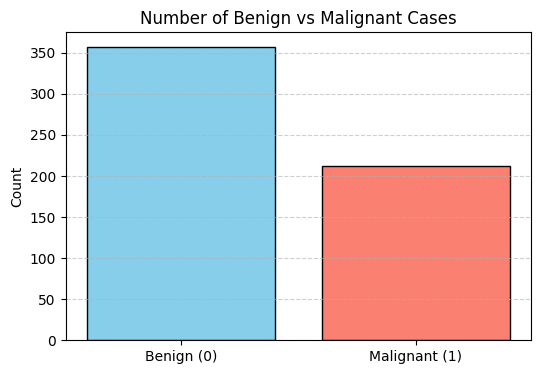

In [20]:
import matplotlib.pyplot as plt

counts = df['diagnosis'].value_counts().sort_index()

labels = ['Benign (0)', 'Malignant (1)']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=colors, edgecolor='black')

plt.title('Number of Benign vs Malignant Cases')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
x_scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [22]:
# Rank features per patient by absolute z-score

def rank_features_per_patient(x_scaled_df, top_k):
    """
    Rank features per patient by absolute z-score value.

    Parameters:
    - x_scaled_df: DataFrame with standardized features (z-scores)
    - top_k: Number of top features to select per patient

    Returns:
    - DataFrame where each row contains the top-k feature names ranked by importance
    """
    ranked_features = []

    for idx in x_scaled_df.index:
        patient_scores = x_scaled_df.loc[idx].abs()
        sorted_features = patient_scores.sort_values(ascending=False)
        top_features = sorted_features.head(top_k).index.tolist()
        ranked_features.append(top_features)

    return pd.DataFrame({'ranked_features': ranked_features}, index=x_scaled_df.index)

top_k = 20
ranked_df = rank_features_per_patient(x_scaled_df, top_k=top_k)

In [23]:
# Discretize features using KBinsDiscretizer

def discretize_features(X_in, strategy, n_bins=3):
    """
    Discretize continuous features into categorical bins using KBinsDiscretizer.

    Parameters:
    - X_in: DataFrame with continuous features (ORIGINAL values, not z-scores)
    - strategy: binning strategy ('uniform', 'quantile', or 'kmeans')
    - n_bins: number of bins (default: 3)

    Returns:
    - DataFrame with discretized categorical features
    """
    kbd = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy=strategy)
    binned = kbd.fit_transform(X_in)

    bin_labels = {0: "low", 1: "mid", 2: "high"}

    df_cat = pd.DataFrame(binned, columns=X_in.columns, index=X_in.index)
    for col in df_cat.columns:
        df_cat[col] = df_cat[col].map(bin_labels)

    return df_cat

disc_uniform = discretize_features(x, strategy="uniform", n_bins=3)
disc_quantile = discretize_features(x, strategy="quantile", n_bins=3)
disc_kmeans = discretize_features(x, strategy="kmeans", n_bins=3)

In [24]:
def create_sequences_with_ties(ranked_df, disc_df, original_values_df, L=5, tie_threshold=0.1):
    """
    Create sequences from ranked features with tie handling.

    GSP Format: A sequence is a list of itemsets: <{item1, item2}, {item3}, {item4, item5}>
    - Features with z-scores within tie_threshold are grouped into same itemset
    - L: Maximum number of itemsets in a sequence (explicit control)
    - max-gap is used during GSP mining (allows skipping elements in pattern matching)

    Parameters:
    - ranked_df: DataFrame with ranked feature names per patient
    - disc_df: DataFrame with discretized values for all features
    - original_values_df: DataFrame with original z-score values (to handle ties)
    - L: Maximum number of itemsets in sequence (default: 5)
    - tie_threshold: threshold for grouping features with similar z-scores

    Returns:
    - DataFrame with sequences (list of itemsets)
    """
    sequences = []

    for idx in ranked_df.index:
        ranked_features = ranked_df.loc[idx, 'ranked_features']
        z_scores = original_values_df.loc[idx].abs()

        # Group features into itemsets based on z-score ties
        sequence = []
        current_itemset = []
        prev_zscore = None

        for feature in ranked_features:
            zscore = z_scores[feature]
            disc_value = disc_df.loc[idx, feature]
            item = f"{disc_value}_{feature}"

            if prev_zscore is not None and abs(zscore - prev_zscore) <= tie_threshold:
                print("Merged")
                current_itemset.append(item)
            else:
                if current_itemset:
                    sequence.append(current_itemset)
                    if len(sequence) >= L:
                        break
                current_itemset = [item]

            prev_zscore = zscore

        if current_itemset and len(sequence) < L:
            sequence.append(current_itemset)

        sequences.append(sequence)

    return pd.DataFrame({'sequence': sequences}, index=ranked_df.index)

L = 10
seq_uniform = create_sequences_with_ties(
    ranked_df, disc_uniform, x_scaled_df,
    L=L,
    tie_threshold=1e-6
)
seq_quantile = create_sequences_with_ties(
    ranked_df, disc_quantile, x_scaled_df,
    L=L,
    tie_threshold=1e-6
)
seq_kmeans = create_sequences_with_ties(
    ranked_df, disc_kmeans, x_scaled_df,
    L=L,
    tie_threshold=1e-6
)


In [27]:
!pip install prefixspan

In [28]:
from prefixspan import PrefixSpan
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

def mine_sequential_patterns(sequences, min_support=0.1):
    """
    Mine frequent sequential patterns using PrefixSpan algorithm.

    Parameters:
    - sequences: list of sequences (each sequence is a list of itemsets)
    - min_support: minimum support threshold (as fraction of total sequences)

    Returns:
    - patterns: list of (pattern, frequency) tuples sorted by frequency
    """

    formatted_sequences = []
    for seq in sequences:
        formatted_seq = []
        for itemset in seq:
            if len(itemset) == 1:
                formatted_seq.append(itemset[0])
            else:
                formatted_seq.append(tuple(itemset))
        formatted_sequences.append(formatted_seq)
    ps = PrefixSpan(formatted_sequences)

    min_support_count = max(1, int(min_support * len(sequences)))
    patterns = ps.frequent(min_support_count)
    patterns_sorted = sorted(patterns, key=lambda x: x[0], reverse=True)

    return patterns_sorted


In [29]:
def prepare_sequences_by_diagnosis(seq_df, y, diagnosis_value):
    """
    Extract sequences for a specific diagnosis.

    Parameters:
    - seq_df: DataFrame with 'sequence' column
    - y: Series with diagnosis labels (1=Malignant, 0=Benign)
    - diagnosis_value: 1 for Malignant, 0 for Benign

    Returns:
    - list of sequences for the specified diagnosis
    """
    indices = y[y == diagnosis_value].index
    sequences = seq_df.loc[indices, 'sequence'].tolist()
    return sequences

# Uniform binning
seq_uniform_malignant = prepare_sequences_by_diagnosis(seq_uniform, y, 1)
seq_uniform_benign = prepare_sequences_by_diagnosis(seq_uniform, y, 0)

# Quantile binning
seq_quantile_malignant = prepare_sequences_by_diagnosis(seq_quantile, y, 1)
seq_quantile_benign = prepare_sequences_by_diagnosis(seq_quantile, y, 0)

# K-means binning
seq_kmeans_malignant = prepare_sequences_by_diagnosis(seq_kmeans, y, 1)
seq_kmeans_benign = prepare_sequences_by_diagnosis(seq_kmeans, y, 0)

In [32]:
min_support = 0.1

patterns_uniform_malignant = mine_sequential_patterns(seq_uniform_malignant, min_support=min_support)
patterns_uniform_benign = mine_sequential_patterns(seq_uniform_benign, min_support=min_support)

patterns_quantile_malignant = mine_sequential_patterns(seq_quantile_malignant, min_support=min_support)
patterns_quantile_benign = mine_sequential_patterns(seq_quantile_benign, min_support=min_support)

patterns_kmeans_malignant = mine_sequential_patterns(seq_kmeans_malignant, min_support=min_support)
patterns_kmeans_benign = mine_sequential_patterns(seq_kmeans_benign, min_support=min_support)

print(f"Uniform - Malignant patterns: {len(patterns_uniform_malignant)}")
print(f"Uniform - Benign patterns: {len(patterns_uniform_benign)}")
print(f"Quantile - Malignant patterns: {len(patterns_quantile_malignant)}")
print(f"Quantile - Benign patterns: {len(patterns_quantile_benign)}")
print(f"K-means - Malignant patterns: {len(patterns_kmeans_malignant)}")
print(f"K-means - Benign patterns: {len(patterns_kmeans_benign)}")
print(patterns_uniform_malignant)

Uniform - Malignant patterns: 66
Uniform - Benign patterns: 89
Quantile - Malignant patterns: 128
Quantile - Benign patterns: 87
K-means - Malignant patterns: 74
K-means - Benign patterns: 84
[(85, ['mid_perimeter_mean']), (83, ['mid_perimeter_worst']), (82, ['mid_radius_worst']), (81, ['mid_radius_mean']), (77, ['mid_area_mean']), (72, ['mid_concave points_mean']), (64, ['high_concave points_worst']), (58, ['mid_concavity_mean']), (57, ['mid_area_worst']), (56, ['mid_radius_mean', 'mid_perimeter_mean']), (56, ['mid_concavity_worst']), (54, ['mid_compactness_worst']), (52, ['mid_compactness_mean']), (51, ['mid_symmetry_worst']), (51, ['mid_texture_worst']), (50, ['mid_radius_worst', 'mid_perimeter_worst']), (50, ['low_fractal_dimension_mean']), (49, ['low_symmetry_se']), (47, ['low_radius_se']), (46, ['mid_texture_mean']), (45, ['low_area_se']), (45, ['mid_radius_mean', 'mid_area_mean']), (45, ['low_perimeter_se']), (41, ['low_smoothness_se']), (41, ['mid_smoothness_mean']), (40, ['mid

In [35]:
def find_discriminative_patterns(patterns_class1, patterns_class2,
                                 n_class1, n_class2,
                                 class1_name="Class1", class2_name="Class2",
                                 min_ratio=2.0, top_k=10):
    """
    Find patterns that are significantly more frequent in one class vs another.

    Parameters:
    - patterns_class1: patterns from class 1 [(freq, pattern), ...] (PrefixSpan format)
    - patterns_class2: patterns from class 2
    - n_class1: total sequences in class 1
    - n_class2: total sequences in class 2
    - class1_name, class2_name: names for display
    - min_ratio: minimum support ratio to consider discriminative
    - top_k: top patterns to show

    Returns:
    - DataFrame with discriminative patterns
    """
    dict1 = {str(p): f for f, p in patterns_class1}
    dict2 = {str(p): f for f, p in patterns_class2}

    all_patterns = set(dict1.keys()) | set(dict2.keys())

    discriminative_results = []

    for pattern_str in all_patterns:
        freq1 = dict1.get(pattern_str, 0)
        freq2 = dict2.get(pattern_str, 0)

        # Calculate support percentages
        support1 = (freq1 / n_class1) * 100
        support2 = (freq2 / n_class2) * 100

        # Calculate ratio (avoid division by zero)
        if freq2 == 0 and freq1 > 0:
            ratio = float('inf')
            favors = class1_name
        elif freq1 == 0 and freq2 > 0:
            ratio = float('inf')
            favors = class2_name
        elif freq1 > 0 and freq2 > 0:
            ratio1 = support1 / support2
            ratio2 = support2 / support1
            if ratio1 > ratio2:
                ratio = ratio1
                favors = class1_name
            else:
                ratio = ratio2
                favors = class2_name
        else:
            continue

        if ratio >= min_ratio:
            discriminative_results.append({
                'Pattern': pattern_str,
                'Favors': favors,
                'Ratio': ratio if ratio != float('inf') else 999,
                f'{class1_name}_Support': f"{freq1} ({support1:.1f}%)",
                f'{class2_name}_Support': f"{freq2} ({support2:.1f}%)"
            })

    df = pd.DataFrame(discriminative_results)
    if len(df) > 0:
        df = df.sort_values('Ratio', ascending=False)

    return df.head(top_k) if len(df) > 0 else df

# Uniform
print("\n" + "="*80)
print("UNIFORM BINNING - Discriminative Patterns")
print("="*80)
disc_uniform = find_discriminative_patterns(
    patterns_uniform_malignant, patterns_uniform_benign,
    n_malignant, n_benign,
    "Malignant", "Benign", min_ratio=2.0, top_k=15
)
if len(disc_uniform) > 0:
    print(disc_uniform.to_string(index=False))
else:
    print("No highly discriminative patterns found.")

# Quantile
print("\n" + "="*80)
print("QUANTILE BINNING - Discriminative Patterns")
print("="*80)
disc_quantile = find_discriminative_patterns(
    patterns_quantile_malignant, patterns_quantile_benign,
    n_malignant, n_benign,
    "Malignant", "Benign", min_ratio=2.0, top_k=15
)
if len(disc_quantile) > 0:
    print(disc_quantile.to_string(index=False))
else:
    print("No highly discriminative patterns found.")

# K-means
print("\n" + "="*80)
print("K-MEANS BINNING - Discriminative Patterns")
print("="*80)
disc_kmeans = find_discriminative_patterns(
    patterns_kmeans_malignant, patterns_kmeans_benign,
    n_malignant, n_benign,
    "Malignant", "Benign", min_ratio=2.0, top_k=15
)
if len(disc_kmeans) > 0:
    print(disc_kmeans.to_string(index=False))
else:
    print("No highly discriminative patterns found.")

SECTION 3: DISCRIMINATIVE PATTERN ANALYSIS

UNIFORM BINNING - Discriminative Patterns
                                                         Pattern    Favors  Ratio Malignant_Support Benign_Support
            ['low_concave points_se', 'low_concave points_mean']    Benign  999.0          0 (0.0%)     49 (13.7%)
                                            ['low_radius_worst']    Benign  999.0          0 (0.0%)    106 (29.7%)
                           ['mid_area_mean', 'mid_radius_worst'] Malignant  999.0        30 (14.2%)       0 (0.0%)
                                     ['low_concave points_mean']    Benign  999.0          0 (0.0%)    112 (31.4%)
                                              ['mid_area_worst'] Malignant  999.0        57 (26.9%)       0 (0.0%)
                           ['low_radius_worst', 'low_area_mean']    Benign  999.0          0 (0.0%)     50 (14.0%)
                                         ['mid_perimeter_worst'] Malignant  999.0        83 (39.2%)       0 (

In [41]:
# ============================================================================
# Discriminative Pattern Analysis
# ============================================================================

import pandas as pd

def find_discriminative_patterns(patterns_class1, patterns_class2,
                                 n_class1, n_class2,
                                 class1_name="Class1", class2_name="Class2",
                                 min_ratio=2.0):
    """
    Find patterns that are significantly more frequent in one class vs another.

    Parameters:
    - patterns_class1: patterns from class 1 [(freq, pattern), ...] (PrefixSpan format)
    - patterns_class2: patterns from class 2
    - n_class1: total sequences in class 1
    - n_class2: total sequences in class 2
    - class1_name, class2_name: names for display
    - min_ratio: minimum support ratio to consider discriminative

    Returns:
    - DataFrame with discriminative patterns (may be empty)
    """
    # Convert to dictionaries for lookup - NOTE: PrefixSpan format is (freq, pattern)
    dict1 = {str(p): f for f, p in patterns_class1}
    dict2 = {str(p): f for f, p in patterns_class2}

    all_patterns = set(dict1.keys()) | set(dict2.keys())
    discriminative_results = []

    for pattern_str in all_patterns:
        freq1 = dict1.get(pattern_str, 0)
        freq2 = dict2.get(pattern_str, 0)

        # Skip patterns that appear in neither class
        if freq1 == 0 and freq2 == 0:
            continue

        # Calculate support percentages
        support1 = (freq1 / n_class1) * 100 if n_class1 > 0 else 0.0
        support2 = (freq2 / n_class2) * 100 if n_class2 > 0 else 0.0

        # Calculate ratio (avoid division by zero)
        if freq2 == 0 and freq1 > 0:
            ratio = float('inf')
            favors = class1_name
        elif freq1 == 0 and freq2 > 0:
            ratio = float('inf')
            favors = class2_name
        elif freq1 > 0 and freq2 > 0:
            ratio1 = support1 / support2
            ratio2 = support2 / support1
            if ratio1 >= ratio2:
                ratio = ratio1
                favors = class1_name
            else:
                ratio = ratio2
                favors = class2_name
        else:
            continue

        # Keep only strongly discriminative patterns
        if ratio >= min_ratio:
            discriminative_results.append({
                'Pattern': pattern_str,
                'Favors': favors,
                'Ratio': ratio if ratio != float('inf') else 999,
                f'{class1_name}_Support': f"{freq1} ({support1:.1f}%)",
                f'{class2_name}_Support': f"{freq2} ({support2:.1f}%)"
            })

    df = pd.DataFrame(discriminative_results)
    if len(df) > 0:
        df = df.sort_values('Ratio', ascending=False)

    return df


def show_discriminative_by_class(disc_df, class1_name="Malignant", class2_name="Benign", top_k=10):
    """
    Given the full discriminative patterns DataFrame, print top-k patterns
    that favor class1 and top-k that favor class2.
    """
    if disc_df is None or len(disc_df) == 0:
        print("No highly discriminative patterns found.")
        return

    # Top patterns favoring class1
    df_c1 = disc_df[disc_df['Favors'] == class1_name].head(top_k)
    # Top patterns favoring class2
    df_c2 = disc_df[disc_df['Favors'] == class2_name].head(top_k)

    if len(df_c1) > 0:
        print(f"\nTop {min(top_k, len(df_c1))} {class1_name}-discriminative patterns:")
        print(df_c1.to_string(index=False))
    else:
        print(f"\nNo patterns strongly favoring {class1_name} (given min_ratio).")

    if len(df_c2) > 0:
        print(f"\nTop {min(top_k, len(df_c2))} {class2_name}-discriminative patterns:")
        print(df_c2.to_string(index=False))
    else:
        print(f"\nNo patterns strongly favoring {class2_name} (given min_ratio).")

min_ratio = 2.0   # at least 2x support difference to be "discriminative"
top_k = 15        # how many patterns to show per class

# UNIFORM
print("\n" + "="*80)
print("UNIFORM BINNING - Discriminative Patterns")
print("="*80)
disc_uniform = find_discriminative_patterns(
    patterns_uniform_malignant, patterns_uniform_benign,
    n_malignant, n_benign,
    class1_name="Malignant", class2_name="Benign",
    min_ratio=min_ratio
)
show_discriminative_by_class(disc_uniform, "Malignant", "Benign", top_k=top_k)

# QUANTILE
print("\n" + "="*80)
print("QUANTILE BINNING - Discriminative Patterns")
print("="*80)
disc_quantile = find_discriminative_patterns(
    patterns_quantile_malignant, patterns_quantile_benign,
    n_malignant, n_benign,
    class1_name="Malignant", class2_name="Benign",
    min_ratio=min_ratio
)
show_discriminative_by_class(disc_quantile, "Malignant", "Benign", top_k=top_k)

# K-MEANS
print("\n" + "="*80)
print("K-MEANS BINNING - Discriminative Patterns")
print("="*80)
disc_kmeans = find_discriminative_patterns(
    patterns_kmeans_malignant, patterns_kmeans_benign,
    n_malignant, n_benign,
    class1_name="Malignant", class2_name="Benign",
    min_ratio=min_ratio
)
show_discriminative_by_class(disc_kmeans, "Malignant", "Benign", top_k=top_k)



UNIFORM BINNING - Discriminative Patterns

Top 15 Malignant-discriminative patterns:
                                                         Pattern    Favors  Ratio Malignant_Support Benign_Support
                           ['mid_area_mean', 'mid_radius_worst'] Malignant  999.0        30 (14.2%)       0 (0.0%)
                                              ['mid_area_worst'] Malignant  999.0        57 (26.9%)       0 (0.0%)
                                         ['mid_perimeter_worst'] Malignant  999.0        83 (39.2%)       0 (0.0%)
                   ['mid_perimeter_mean', 'mid_perimeter_worst'] Malignant  999.0        39 (18.4%)       0 (0.0%)
             ['high_concave points_worst', 'mid_concavity_mean'] Malignant  999.0         21 (9.9%)       0 (0.0%)
                       ['mid_radius_mean', 'mid_perimeter_mean'] Malignant  999.0        56 (26.4%)       0 (0.0%)
['mid_radius_mean', 'mid_perimeter_mean', 'mid_perimeter_worst'] Malignant  999.0        31 (14.6%)       0 (

In [40]:
def extract_features_from_patterns(patterns, top_k=50):
    """
    Extract all features that appear in the top-k patterns.

    Parameters:
    - patterns: list of (freq, pattern) tuples (PrefixSpan format)

    Returns:
    - Counter of feature appearances
    """
    feature_counter = Counter()

    for freq, pattern in patterns[:top_k]:
        for item in pattern:
            if isinstance(item, tuple):
                # Multiple items in one itemset
                for subitem in item:
                    # Extract feature name (after the discretization level)
                    parts = subitem.split('_', 1)
                    if len(parts) == 2:
                        feature_counter[parts[1]] += freq
            else:
                # Single item
                parts = item.split('_', 1)
                if len(parts) == 2:
                    feature_counter[parts[1]] += freq

    return feature_counter

def analyze_pattern_characteristics(patterns, strategy_name, class_name):
    """
    Analyze structural characteristics of patterns.

    Parameters:
    - patterns: list of (freq, pattern) tuples (PrefixSpan format)
    """
    if len(patterns) == 0:
        return None

    lengths = []
    itemset_sizes = []

    for freq, pattern in patterns:
        lengths.append(len(pattern))
        for item in pattern:
            if isinstance(item, tuple):
                itemset_sizes.append(len(item))
            else:
                itemset_sizes.append(1)

    return {
        'Strategy': strategy_name,
        'Class': class_name,
        'Avg Pattern Length': np.mean(lengths),
        'Max Pattern Length': np.max(lengths),
        'Avg Itemset Size': np.mean(itemset_sizes),
        'Single-Item %': (itemset_sizes.count(1) / len(itemset_sizes) * 100)
    }

strategies = {
    'Uniform': (patterns_uniform_malignant, patterns_uniform_benign),
    'Quantile': (patterns_quantile_malignant, patterns_quantile_benign),
    'K-means': (patterns_kmeans_malignant, patterns_kmeans_benign)
}

# 4B: Pattern Characteristics Comparison
print("\n" + "-"*80)
print("PATTERN STRUCTURAL CHARACTERISTICS")
print("-"*80)

characteristics = []
for strategy_name, (mal_patterns, ben_patterns) in strategies.items():
    char_mal = analyze_pattern_characteristics(mal_patterns, strategy_name, "Malignant")
    char_ben = analyze_pattern_characteristics(ben_patterns, strategy_name, "Benign")
    if char_mal:
        characteristics.append(char_mal)
    if char_ben:
        characteristics.append(char_ben)

char_df = pd.DataFrame(characteristics)
print(char_df.to_string(index=False))

# 4C: Cross-Strategy Pattern Consistency
print("\n" + "-"*80)
print("CROSS-STRATEGY PATTERN CONSISTENCY")
print("-"*80)

def get_pattern_set(patterns, top_k=20):
    """Get set of pattern strings. Patterns are in (freq, pattern) format."""
    return {str(p) for f, p in patterns[:top_k]}

# Malignant patterns
mal_uniform = get_pattern_set(patterns_uniform_malignant, 20)
mal_quantile = get_pattern_set(patterns_quantile_malignant, 20)
mal_kmeans = get_pattern_set(patterns_kmeans_malignant, 20)

# Benign patterns
ben_uniform = get_pattern_set(patterns_uniform_benign, 20)
ben_quantile = get_pattern_set(patterns_quantile_benign, 20)
ben_kmeans = get_pattern_set(patterns_kmeans_benign, 20)

print("\nMalignant Patterns - Overlap Analysis:")

if len(mal_uniform & mal_quantile & mal_kmeans) > 0:
    print("\n  Robust Malignant Patterns (appear in all strategies):")
    for pattern in list(mal_uniform & mal_quantile & mal_kmeans)[:10]:
        print(f"    {pattern}")

print("\nBenign Patterns - Overlap Analysis:")

if len(ben_uniform & ben_quantile & ben_kmeans) > 0:
    print("\n  Robust Benign Patterns (appear in all strategies):")
    for pattern in list(ben_uniform & ben_quantile & ben_kmeans)[:10]:
        print(f"    {pattern}")


--------------------------------------------------------------------------------
PATTERN STRUCTURAL CHARACTERISTICS
--------------------------------------------------------------------------------
Strategy     Class  Avg Pattern Length  Max Pattern Length  Avg Itemset Size  Single-Item %
 Uniform Malignant            1.515152                   3               1.0          100.0
 Uniform    Benign            1.685393                   3               1.0          100.0
Quantile Malignant            1.843750                   3               1.0          100.0
Quantile    Benign            1.597701                   3               1.0          100.0
 K-means Malignant            1.540541                   3               1.0          100.0
 K-means    Benign            1.678571                   3               1.0          100.0

--------------------------------------------------------------------------------
CROSS-STRATEGY PATTERN CONSISTENCY
-----------------------------------------